importing necessary libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importing dataset

In [36]:
df = pd.read_csv("Titanic-Dataset.csv")

basic properties of dataset

In [37]:
df.shape

(891, 12)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [41]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [42]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


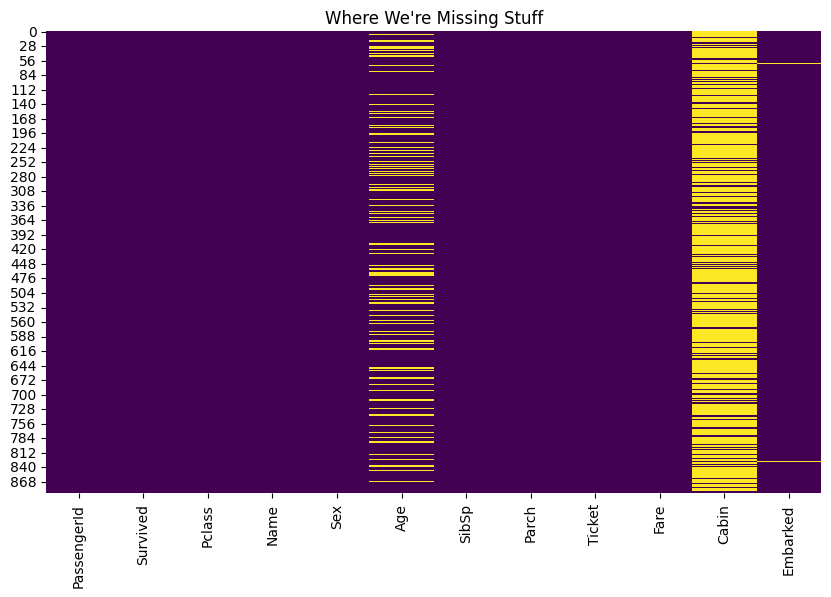

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Where We're Missing Stuff")
plt.show()

working with null values

In [44]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True) # Group all missing cabins as 'Unknown'

In [45]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


analysis of dataset by showing distributions

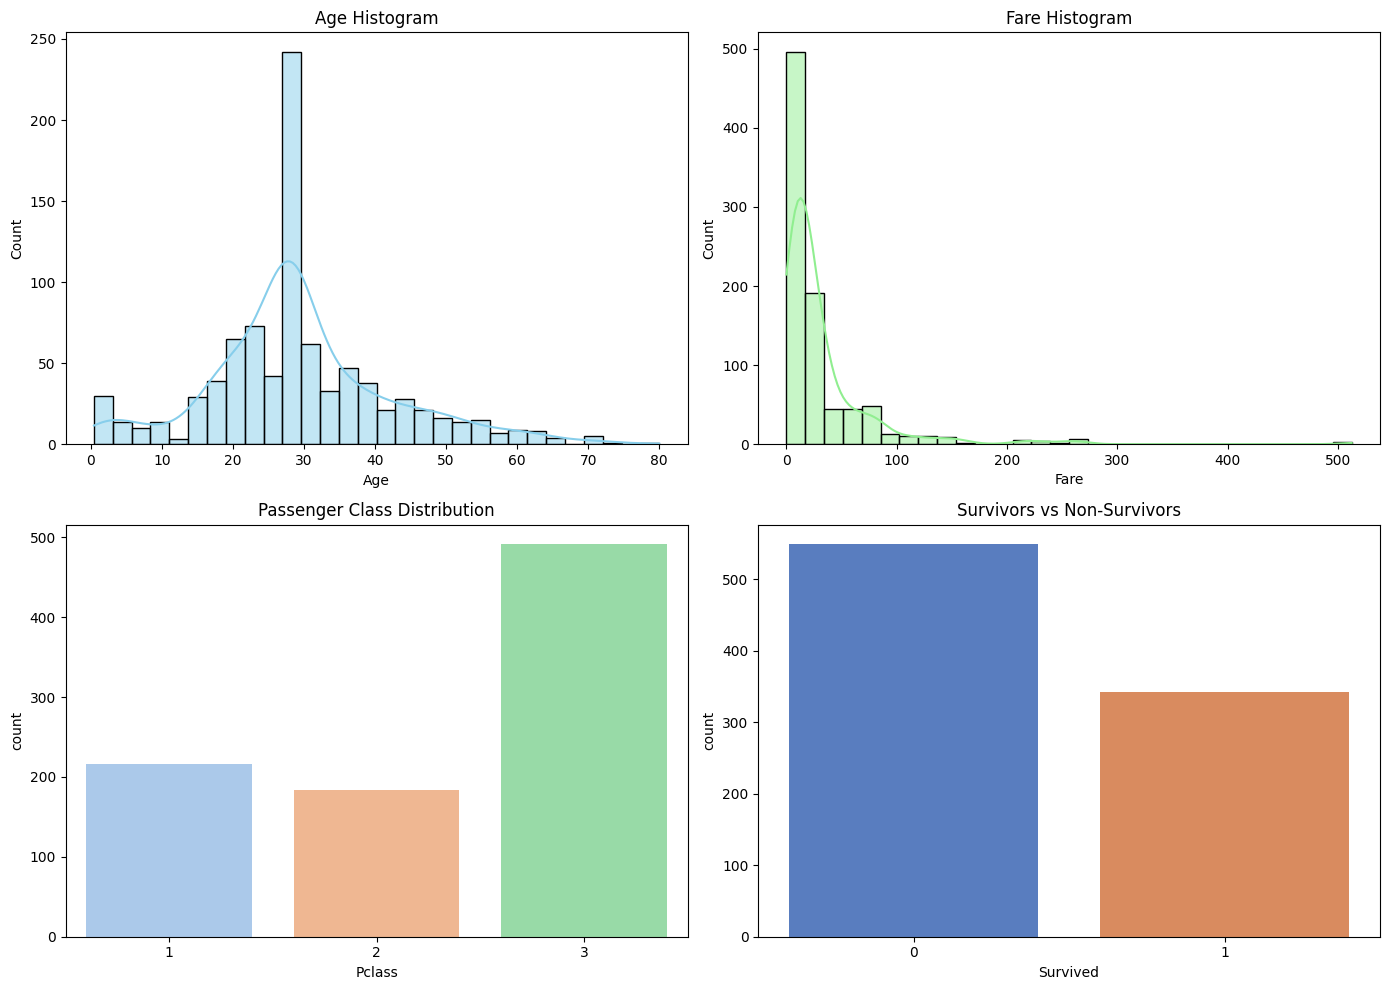

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Age Histogram")

sns.histplot(df['Fare'], kde=True, bins=30, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Fare Histogram")

sns.countplot(x='Pclass', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("Passenger Class Distribution")

sns.countplot(x='Survived', data=df, ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Survivors vs Non-Survivors")

plt.tight_layout()
plt.show()

Outlier detection

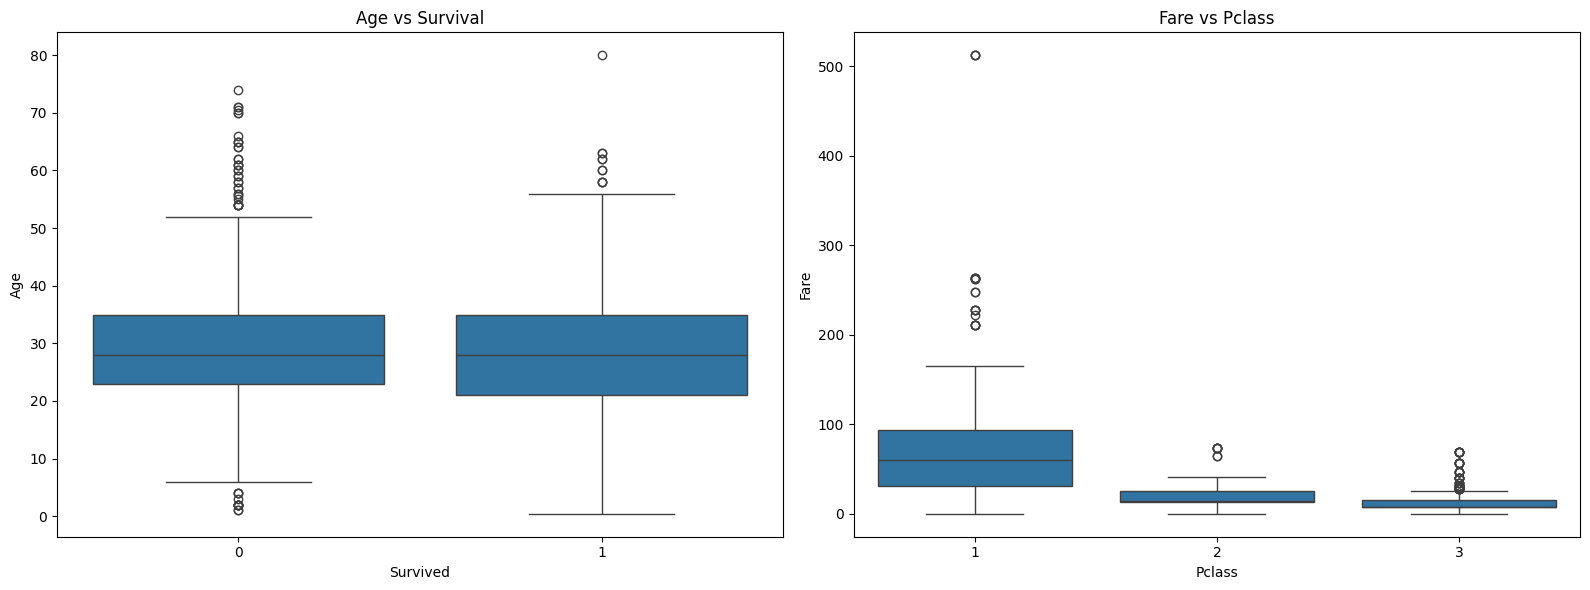

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='Survived', y='Age', data=df, ax=ax[0])
ax[0].set_title("Age vs Survival")

sns.boxplot(x='Pclass', y='Fare', data=df, ax=ax[1])
ax[1].set_title("Fare vs Pclass")

plt.tight_layout()
plt.show()

correlation matrix

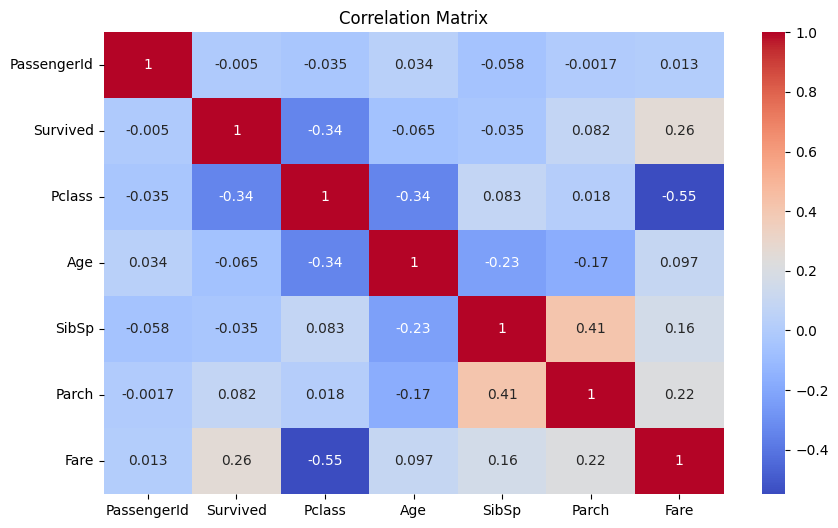

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

analysis of categorical fields line up with survival

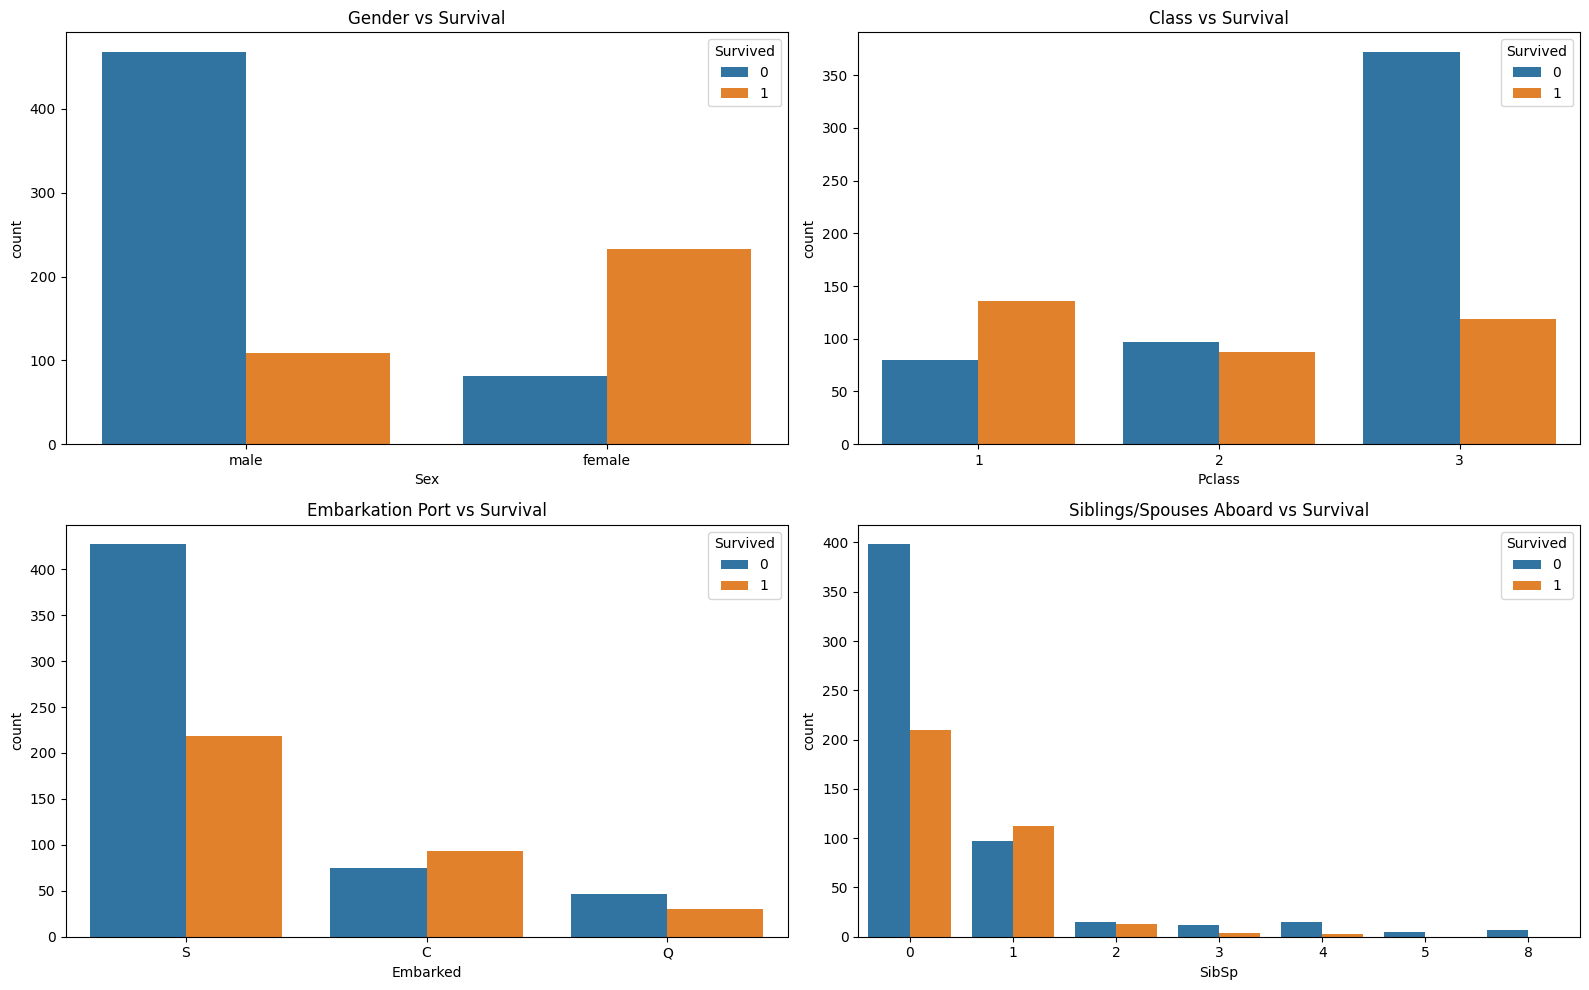

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0,0])
axes[0,0].set_title('Gender vs Survival')

sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0,1])
axes[0,1].set_title('Class vs Survival')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[1,0])
axes[1,0].set_title('Embarkation Port vs Survival')

sns.countplot(x='SibSp', hue='Survived', data=df, ax=axes[1,1])
axes[1,1].set_title('Siblings/Spouses Aboard vs Survival')

plt.tight_layout()
plt.show()

Feature Engineering

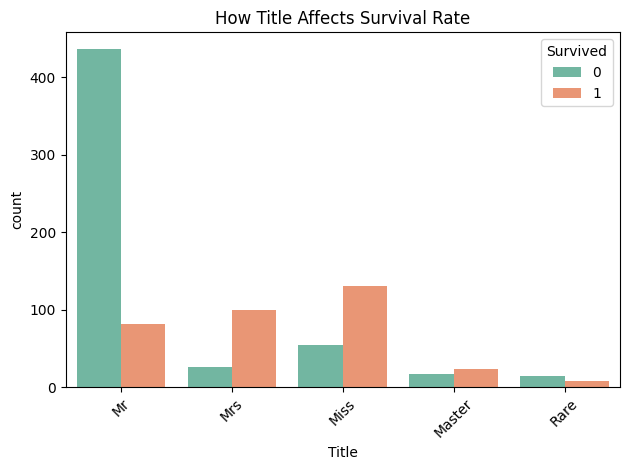

In [50]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

rare_titles = ['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

sns.countplot(x='Title', hue='Survived', data=df, palette='Set2')
plt.title('How Title Affects Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

